# PHRASE EXTRACTION FOR REMINDERS

In [2]:
#import all the necessary packages.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import re
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import svm,neighbors,linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

In [3]:
data = pd.read_csv('training_data.tsv',header=0,delimiter="\t" ,quoting=3)

In [4]:
print ('Number of data points : ', data.shape[0], \
       'Number of features/variables:', data.shape[1])

Number of data points :  9819 Number of features/variables: 2


In [5]:
data.columns

Index(['sent', 'label'], dtype='object')

In [6]:
data.head(10)

,sent,label
0,Make remainder,Not Found
1,Set a reminder on date 23rd November'2016,Not Found
2,I need a daily wake up call,wake up call
3,remind me 6 pm today eveng,Not Found
4,Hi Pls to make one reminder for me,Not Found
5,Remind me at 28 December for recharge,recharge
6,Can u help me with reminder..,Not Found
7,Can u pls remind me at 7pm on 8 Jan,on 8 Jan
8,What is my next reminder?,What
9,Can u please set me an alarm at 7.30 am,Not Found


In [7]:
print(data['sent'].describe())

count                   9818
unique                  9811
top       Remind to pay rent
freq                       2
Name: sent, dtype: object


In [8]:
print(data['sent'].unique())

['Make remainder' "Set a reminder on date 23rd November'2016"
 'I need a daily wake up call' ...
 'Saumya remind me of going to attend a meeting on 1st of march 2017 at10am'
 'Can u schedule fr every coming year'
 'Tume acha kaam mila ha koi remainder set ni krta hoga pehle recahrge vala busy tha ab shopping vali shraddha busy ha muje reply ni kr rhi']


In [9]:
print(data['label'].describe())

count          9819
unique         5322
top       Not Found
freq           3912
Name: label, dtype: object


In [10]:
def  notfound(x):
    if x=='Not Found':
        return 0
    return 1
#changing reviews with score less than 3 to be positive and vice-versa
actualdata= data['label']
positiveNegative= actualdata.map(notfound) 
data['label'] = positiveNegative
print("Number of data points in our data", data.shape)
data.head(10)

Number of data points in our data (9819, 2)


,sent,label
0,Make remainder,0
1,Set a reminder on date 23rd November'2016,0
2,I need a daily wake up call,1
3,remind me 6 pm today eveng,0
4,Hi Pls to make one reminder for me,0
5,Remind me at 28 December for recharge,1
6,Can u help me with reminder..,0
7,Can u pls remind me at 7pm on 8 Jan,1
8,What is my next reminder?,1
9,Can u please set me an alarm at 7.30 am,0


In [11]:
data.duplicated(subset={"sent"}).value_counts()

False    9812
True        7
dtype: int64

In [12]:
data=data.drop_duplicates(subset={"sent"},keep="first")

In [13]:
data.shape[0]

9812

# BAG OF WORDS

In [13]:
title_vectorizer = CountVectorizer()
title_features = title_vectorizer.fit_transform(data['sent'].values.astype('U'))
title_features.get_shape()

(9812, 6364)

In [14]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(title_features,data['label'].values,test_size=0.2 ,random_state=0,shuffle=True)

Accuracy on test set: 84.921%
Precision on test set: 0.896
Recall on test set: 0.840
F1-Score on test set: 0.868
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



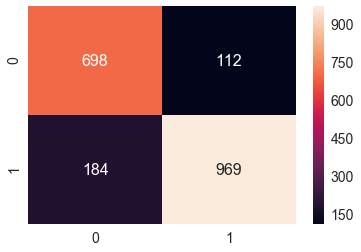

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
clf = LogisticRegression(C= 10, penalty= 'l2')
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Ytest, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Ytest, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Ytest, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Ytest, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Ytest, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## NGRAM

In [16]:
vectorizer = CountVectorizer(ngram_range=(1,2)) # n-grams Bag of word
train_data_features = vectorizer.fit_transform(data['sent'].values.astype('U')) # expects a list of strings
np.asarray(train_data_features) #Tfidf expects an array hence we convert it
###### representing the n-grams wrt to the frequency of occurence ######
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(train_data_features)

In [17]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_train_tfidf,data['label'].values,test_size=0.2 ,random_state=0,shuffle=True)

Accuracy on test set: 85.481%
Precision on test set: 0.868
Recall on test set: 0.888
F1-Score on test set: 0.878
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



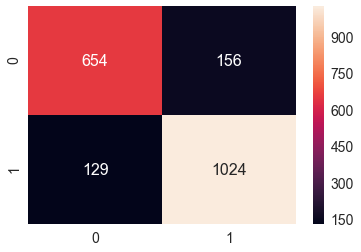

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
clf = LogisticRegression(C= 10, penalty= 'l2')
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Ytest, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Ytest, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Ytest, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Ytest, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Ytest, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g'

In [19]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train_tfidf,data['label'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

Accuracy on test set: 95.976%
Precision on test set: 0.962
Recall on test set: 0.970
F1-Score on test set: 0.966
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



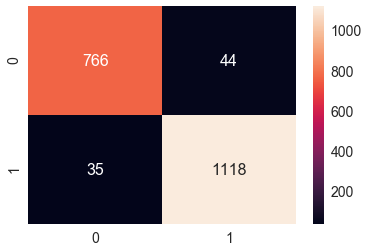

In [20]:
y_pred = clf.predict(Xtest)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Ytest, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Ytest, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Ytest, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Ytest, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Ytest, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## TFIDF

In [21]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features= tfidf_title_vectorizer.fit_transform(data['sent'].values.astype('U'))

In [22]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(tfidf_title_features,data['label'].values,test_size=0.2 ,random_state=0,shuffle=True)

Accuracy on test set: 84.463%
Precision on test set: 0.872
Recall on test set: 0.862
F1-Score on test set: 0.867
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



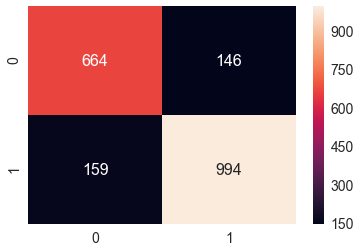

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
clf = LogisticRegression(C= 10, penalty= 'l2')
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Ytest, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Ytest, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Ytest, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Ytest, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Ytest, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Accuracy on test set: 93.887%
Precision on test set: 0.945
Recall on test set: 0.951
F1-Score on test set: 0.948
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



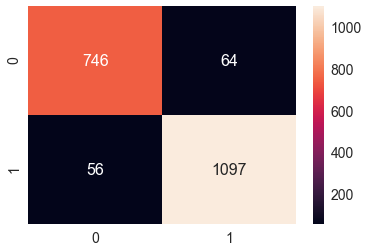

In [24]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(tfidf_title_features,data['label'].values,test_size=0.2 ,random_state=0,shuffle=True)
clf.fit(tfidf_title_features,data['label'])
y_pred = clf.predict(Xtest)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Ytest, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Ytest, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Ytest, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Ytest, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Ytest, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

## WORD2VEC

In [25]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.

'''
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
'''

#if you do NOT have RAM >= 12GB, use the code below.
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)

C:\Users\User\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [26]:
def get_word_vec(sentence):
    vec = []
    for i in sentence.split():
        if i in vocab:
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

In [27]:
vocab = model.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    for word in sentence.split():
        nwords += 1
        if word in vocab:
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

In [28]:
doc_id = 0
w2v_title = []
# for every title we build a avg vector representation
for i in data['sent']:
    w2v_title.append(build_avg_vec(str(i), 300))
    doc_id += 1

# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)
w2v_title.shape

(9812, 300)

In [29]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(w2v_title,data['label'].values,test_size=0.2 ,random_state=0,shuffle=True)

Accuracy on test set: 74.274%
Precision on test set: 0.751
Recall on test set: 0.840
F1-Score on test set: 0.793
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



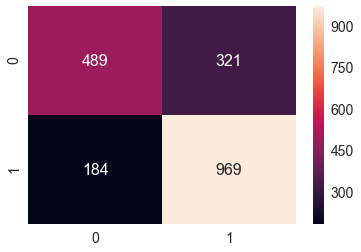

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
clf = LogisticRegression(C= 10, penalty= 'l2')
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Ytest, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Ytest, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Ytest, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Ytest, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Ytest, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# data preprocessing without stemming

In [31]:
# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)
k=[]
def nlp_preprocessing(total_text):
    if type(total_text) is not int:
        string = ""
        for words in str(total_text).split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc
                word = ("".join(e for e in words if e.isalnum()))
                # Conver all letters to lower-case
                word = word.lower()
                # stop-word removal
                if not word in stop_words:
                    string += word + " "
        k.append(string)

list of stop words: {'you', 'nor', 'all', 'its', 'only', 'as', 'their', 's', 'which', 'y', "should've", "hasn't", 't', 'yourself', "wasn't", 'on', 'few', 'hadn', 'our', 'such', 'me', 'and', 're', 'who', 'his', 'mightn', 'is', 'to', 'have', 'once', 'doesn', 'of', 'm', 'most', 'o', 'more', "aren't", 'after', 'the', 'through', 'been', 'into', 'out', 'wasn', 'for', 'do', "it's", 'doing', 'any', 'with', 'ours', 'he', 'does', "hadn't", 'should', "didn't", 'other', 'when', 'below', 'them', 'll', 'own', "shouldn't", "you'll", 'those', 'then', 'no', 've', 'so', 'haven', 'am', 'himself', "couldn't", 'same', "mightn't", 'some', 'again', 'these', 'ma', 'from', 'until', "doesn't", 'hasn', 'needn', "you're", 'your', 'very', 'will', 'over', "weren't", "wouldn't", "needn't", 'my', 'she', 'an', 'herself', 'but', "she's", 'because', 'has', 'itself', 'before', 'this', 'about', 'down', 'it', 'further', 'don', "you'd", 'be', 'can', 'mustn', 'why', 'each', 'above', 'against', 'a', 'd', 'had', 'themselves', 

In [32]:
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['sent'])
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")
print(len(k))

0.8590152829821072 seconds
9812


In [33]:
data['cleaned']=k

In [34]:
data.head()

,sent,label,cleaned
0,Make remainder,0,make remainder
1,Set a reminder on date 23rd November'2016,0,set reminder date 23rd november2016
2,I need a daily wake up call,1,need daily wake call
3,remind me 6 pm today eveng,0,remind 6 pm today eveng
4,Hi Pls to make one reminder for me,0,hi pls make one reminder


In [35]:
title_vectorizer = CountVectorizer()
title_features = title_vectorizer.fit_transform(data['cleaned'].values.astype('U'))
title_features.get_shape()

(9812, 6908)

In [36]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(title_features,data['label'].values,test_size=0.2 ,random_state=0)

Accuracy on test set: 80.183%
Precision on test set: 0.864
Recall on test set: 0.787
F1-Score on test set: 0.823
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



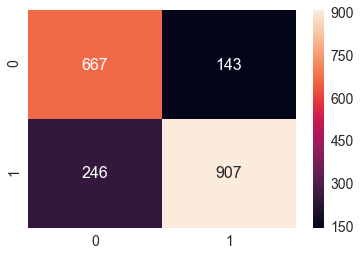

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
clf = LogisticRegression(C= 10, penalty= 'l2')
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Ytest, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Ytest, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Ytest, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Ytest, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Ytest, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [38]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['cleaned'].values.astype('U'))

In [39]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(tfidf_title_features,data['label'].values,test_size=0.2 ,random_state=0)

Accuracy on test set: 79.165%
Precision on test set: 0.817
Recall on test set: 0.832
F1-Score on test set: 0.824
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



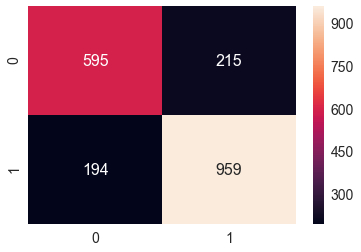

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
clf = LogisticRegression(C= 10, penalty= 'l2')
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Ytest, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Ytest, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Ytest, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Ytest, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Ytest, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [41]:
w2v_title = []
# for every title we build a avg vector representation
for i in data['cleaned']:
    w2v_title.append(build_avg_vec(str(i), 300))
# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)
w2v_title.shape

(9812, 300)

In [42]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(w2v_title,data['label'].values,test_size=0.2 ,random_state=0,shuffle=True)

Accuracy on test set: 77.585%
Precision on test set: 0.802
Recall on test set: 0.821
F1-Score on test set: 0.811
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



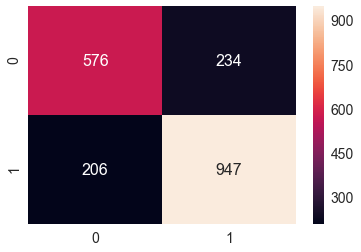

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
clf = LogisticRegression(C= 10, penalty= 'l2')
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Ytest, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Ytest, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Ytest, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Ytest, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Ytest, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# Data preprocessing with stemming

In [44]:
from nltk.stem import SnowballStemmer
snow = SnowballStemmer('english') #initialising the snowball stemmer
print("Stem/Root words of the some of the words using SnowBall Stemmer:")
print(snow.stem('tasty'))
print(snow.stem('tasteful'))
print(snow.stem('tastiest'))
print(snow.stem('delicious'))
print(snow.stem('amazing'))
print(snow.stem('amaze'))
print(snow.stem('initialize'))
print(snow.stem('fabulous'))
print(snow.stem('Honda City'))

Stem/Root words of the some of the words using SnowBall Stemmer:
tasti
tast
tastiest
delici
amaz
amaz
initi
fabul
honda c


In [45]:
# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)
k=[]
snow = SnowballStemmer('english')
def nlp_preprocessing(total_text):
    if type(total_text) is not int:
        string = ""
        for words in str(total_text).split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string +=snow.stem(word) + " "
        k.append(string)

list of stop words: {'you', 'nor', 'all', 'its', 'only', 'as', 'their', 's', 'which', 'y', "should've", "hasn't", 't', 'yourself', "wasn't", 'on', 'few', 'hadn', 'our', 'such', 'me', 'and', 're', 'who', 'his', 'mightn', 'is', 'to', 'have', 'once', 'doesn', 'of', 'm', 'most', 'o', 'more', "aren't", 'after', 'the', 'through', 'been', 'into', 'out', 'wasn', 'for', 'do', "it's", 'doing', 'any', 'with', 'ours', 'he', 'does', "hadn't", 'should', "didn't", 'other', 'when', 'below', 'them', 'll', 'own', "shouldn't", "you'll", 'those', 'then', 'no', 've', 'so', 'haven', 'am', 'himself', "couldn't", 'same', "mightn't", 'some', 'again', 'these', 'ma', 'from', 'until', "doesn't", 'hasn', 'needn', "you're", 'your', 'very', 'will', 'over', "weren't", "wouldn't", "needn't", 'my', 'she', 'an', 'herself', 'but', "she's", 'because', 'has', 'itself', 'before', 'this', 'about', 'down', 'it', 'further', 'don', "you'd", 'be', 'can', 'mustn', 'why', 'each', 'above', 'against', 'a', 'd', 'had', 'themselves', 

In [46]:
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['sent'])
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")
print(k)

1.6510570767048933 seconds
['make remaind ', 'set remind date 23rd november2016 ', 'need daili wake call ', 'remind 6 pm today eveng ', 'hi pls make one remind ', 'remind 28 decemb recharg ', 'u help remind ', 'u pls remind 7pm 8 jan ', 'next remind ', 'u pleas set alarm 730 ', 'set remind 4 th dec go meet sonal miss 200 pm ', 'remind purchas shoe polish liquid date3 jan time630 pm ', 'thank least ill rememb love birthday time ', 'setd remind dint remain ', 'susan dmello meet sujit sir remind tomorrow ', 'need set remind msg babbu 7 even ', 'hi give remind pay lic premium tonight 9 pm ', '3 alarm 715 730 745 ', 'daili ', 'remind go bank 11 today ', 'remind buy egg next monday tuesday 9pm ', 'pleas remind intern audit review meet 1245 today ', 'one remind ', 'even 5 oclock ', 'remind sbi card payment rs 4465 041216 11am ', 'unsubscrib remind ', 'thank remind  ', 'remind tomorrow 1130 go basic code share market ', 'need remind list start till ', 'hi u pleas set remind 2pm ', 'want remind

In [47]:
data['cleaned2']=k

In [48]:
data.head()

,sent,label,cleaned,cleaned2
0,Make remainder,0,make remainder,make remaind
1,Set a reminder on date 23rd November'2016,0,set reminder date 23rd november2016,set remind date 23rd november2016
2,I need a daily wake up call,1,need daily wake call,need daili wake call
3,remind me 6 pm today eveng,0,remind 6 pm today eveng,remind 6 pm today eveng
4,Hi Pls to make one reminder for me,0,hi pls make one reminder,hi pls make one remind


In [49]:
title_vectorizer = CountVectorizer()
title_features = title_vectorizer.fit_transform(data['cleaned2'].values.astype('U'))
title_features.get_shape()

(9812, 6131)

In [50]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(title_features,data['label'].values,test_size=0.2 ,random_state=0)

In [51]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['cleaned2'].values.astype('U'))

Accuracy on test set: 79.725%
Precision on test set: 0.862
Recall on test set: 0.780
F1-Score on test set: 0.819
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



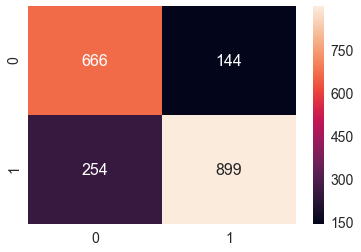

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
clf = LogisticRegression(C= 10, penalty= 'l2')
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Ytest, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Ytest, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Ytest, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Ytest, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Ytest, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [53]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(title_features,data['label'].values,test_size=0.2 ,random_state=0)

Accuracy on test set: 79.725%
Precision on test set: 0.862
Recall on test set: 0.780
F1-Score on test set: 0.819
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



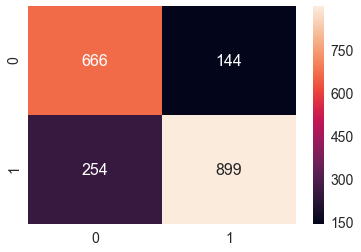

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
clf = LogisticRegression(C= 10, penalty= 'l2')
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Ytest, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Ytest, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Ytest, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Ytest, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Ytest, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')